In [0]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("dataset_model.csv",sep=",")
l=df.columns
print(l)
for i in l:
  if(len(df[i].unique())==df.shape[0]):
    #print(i)
    a=str(i)
# Dropping the column with unique value for all the records
new_df=df.drop([a],axis=1)
print("Shape : " ,new_df.shape)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Shape :  (614, 12)


In [4]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
continous_var=new_df._get_numeric_data().columns
cols=[str(i) for i in new_df.columns]
#print(continous_var)
conti_var=[]
for i in continous_var:
  if(len(new_df[i].unique()) >= int(new_df.shape[0]/25)):
    conti_var.append(str(i))
#print(conti_var) #['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
cate_var=list(set(cols) - set(conti_var))
#print(cate_var) #['Education', 'Loan_Amount_Term', 'Self_Employed', 'Property_Area', 'Dependents', 'Gender', 'Married', 'Loan_Status', 'Credit_History']
#conti_var is the list of continous variables
#cate_var is the list of categorical variables

Handling the outliers  outliers

In [6]:
for i in conti_var:
  print(i,"\t=> " ,new_df[i].skew())
for i in conti_var:
  Q1=new_df[i].quantile(0.05) #bottom 5 percentile
  Q3=new_df[i].quantile(0.95) #above 95 percentile
  new_df[i] = np.where(new_df[i] < Q1,Q1,new_df[i])
  new_df[i] = np.where(new_df[i] > Q3, Q3,new_df[i])
print("\n------------Skew After Perfroming Quantile based capping-------------\n")
for i in conti_var:
  print(i,"\t=> " ,new_df[i].skew())

ApplicantIncome 	=>  6.539513113994625
CoapplicantIncome 	=>  7.491531216657306
LoanAmount 	=>  2.677551679256059

------------Skew After Perfroming Quantile based capping-------------

ApplicantIncome 	=>  1.7637799807028802
CoapplicantIncome 	=>  0.8452039718003408
LoanAmount 	=>  1.0594654991821644


Hadling missing values 

In [7]:
print("Number of Null values \n")
print(new_df.isnull().sum())

# Handling the null values 
for i in new_df._get_numeric_data().columns:
  new_df[i]=new_df[i].fillna(new_df[i].median())
for j in list(set(new_df.columns)-set(new_df._get_numeric_data().columns)):
  new_df[j]=new_df[j].fillna(new_df[j].mode().iloc[0])
print("Number of Null values after processing \n")
print(new_df.isnull().sum())

Number of Null values 

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Number of Null values after processing 

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


**----------Use Label Encoder as encoding technique on features , predict using below algorithms----------**

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [0]:
le = LabelEncoder()
enc=new_df.copy()
for j in cate_var: # Encoding the categorical variables
  enc['enc_'+str(j)] = le.fit_transform(enc[j])
enc = enc.drop(columns = cate_var) #Dropping original columns


In [10]:
print(enc.shape)
enc.head()

(614, 12)


,ApplicantIncome,CoapplicantIncome,LoanAmount,enc_Property_Area,enc_Married,enc_Credit_History,enc_Loan_Status,enc_Gender,enc_Dependents,enc_Self_Employed,enc_Education,enc_Loan_Amount_Term
0,5849.0,0.0,128.0,2,0,1,1,1,0,0,0,8
1,4583.0,1508.0,128.0,0,1,1,0,1,1,0,0,8
2,3000.0,0.0,66.0,2,1,1,1,1,0,1,0,8
3,2583.0,2358.0,120.0,2,1,1,1,1,0,0,1,8
4,6000.0,0.0,141.0,2,0,1,1,1,0,0,0,8


In [11]:
print(enc['enc_Loan_Status'].value_counts())
l_1,l_2= enc['enc_Loan_Status'].value_counts()
print("Class Label 1 is : ",(l_1/enc.shape[0])*100,"%")
print("Class Label 0 is : ",(l_2/enc.shape[0])*100,"%")

1    422
0    192
Name: enc_Loan_Status, dtype: int64
Class Label 1 is :  68.72964169381108 %
Class Label 0 is :  31.27035830618892 %


In [12]:
#splitting into training (75%) and testing (25%)
df_t=pd.DataFrame(enc['enc_Loan_Status'])
df_t.columns= (['Loan_Status'])
#df_t
enc=enc.drop(columns='enc_Loan_Status')
X_train, x_test, Y_train, y_test = train_test_split(enc,df_t,test_size = 0.25, random_state = 21, stratify = df_t)
print("TRAIN(X_train) Feature set        : ",len(X_train))
print("TRAIN(Y_train) Label Feature set  : ",len(Y_train))
print("TEST (x_test)  Feature set        : ",len(x_test))
print("TEST (y_test)  Label set          : ",len(y_test))

TRAIN(X_train) Feature set        :  460
TRAIN(Y_train) Label Feature set  :  460
TEST (x_test)  Feature set        :  154
TEST (y_test)  Label set          :  154


In [13]:
print("-------For Training Set--------\n")
print(Y_train['Loan_Status'].value_counts())
l_1,l_2= Y_train['Loan_Status'].value_counts()
print("Class Label 1 is : ",(l_1/Y_train.shape[0])*100,"%")
print("Class Label 0 is : ",(l_2/Y_train.shape[0])*100,"%")
print("\n-------For Testing Set--------\n")
print(y_test['Loan_Status'].value_counts())
l_1,l_2= y_test['Loan_Status'].value_counts()
print("Class Label 1 is : ",(l_1/y_test.shape[0])*100,"%")
print("Class Label 0 is : ",(l_2/y_test.shape[0])*100,"%")

-------For Training Set--------

1    316
0    144
Name: Loan_Status, dtype: int64
Class Label 1 is :  68.69565217391305 %
Class Label 0 is :  31.30434782608696 %

-------For Testing Set--------

1    106
0     48
Name: Loan_Status, dtype: int64
Class Label 1 is :  68.83116883116884 %
Class Label 0 is :  31.16883116883117 %



**1.Using Logistic Regression**

Perform the parameter tuning and list your best performance metrics on -

Precision ,Recall & F1 Score ,AUROC

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
logi = LogisticRegression(random_state=21)
logi.fit(X_train, Y_train)
y_pred1 = logi.predict(x_test)
print("y_pred1 : ",y_pred1)

y_pred1 :  [0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
print("Confusion Matrix       : \n" ,confusion_matrix(y_test,y_pred1))
print("Accuracy of Model      : ",accuracy_score(y_test, y_pred1))
print("Precision of Model     : ",precision_score(y_test, y_pred1))
print("Recall of Model        : " , recall_score(y_test, y_pred1))
print("F1 Score of Model      : " ,f1_score(y_test, y_pred1))
print("ROC_AUC score of Model : " ,roc_auc_score(y_test,y_pred1))

Confusion Matrix       : 
 [[ 21  27]
 [  0 106]]
Accuracy of Model      :  0.8246753246753247
Precision of Model     :  0.7969924812030075
Recall of Model        :  1.0
F1 Score of Model      :  0.8870292887029287
ROC_AUC score of Model :  0.71875


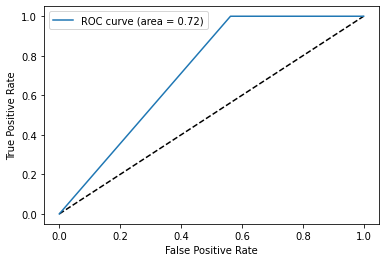

In [30]:
from matplotlib import pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test,y_pred1)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

**2.Using RandomForest Classifier** - 

Perform the parameter tuning and list your best performance metrics on

Precision ,Recall & F1 Score ,AUROC

In [47]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=21)
forest.fit(X_train,Y_train)
y_pred2 = forest.predict(x_test)
print("y_pred2 : ",y_pred2)

y_pred2 :  [0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 1 0 1 0 1]


In [48]:
print("Confusion Matrix       : \n" ,confusion_matrix(y_test,y_pred2))
print("Accuracy of Model      : ",accuracy_score(y_test, y_pred2))
print("Precision of Model     : ",precision_score(y_test, y_pred2))
print("Recall of Model        : " , recall_score(y_test, y_pred2))
print("F1 Score of Model      : " ,f1_score(y_test, y_pred2))
print("ROC_AUC score of Model : " ,roc_auc_score(y_test,y_pred2))

Confusion Matrix       : 
 [[ 23  25]
 [  4 102]]
Accuracy of Model      :  0.8116883116883117
Precision of Model     :  0.8031496062992126
Recall of Model        :  0.9622641509433962
F1 Score of Model      :  0.8755364806866953
ROC_AUC score of Model :  0.7207154088050314


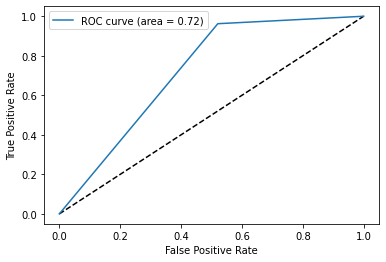

In [35]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred2)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

**---------- Use One hot Encoder as encoding technique on feature , predict using the below algorithms ----------**

In [20]:
enc_oh=new_df.copy()
enc_oh['enc_Loan_Status'] = le.fit_transform(enc_oh['Loan_Status'])
enc_oh=enc_oh.drop(columns=['Loan_Status'])
for j in list(set(cate_var)-{'Loan_Status'}) :
   enc_oh = pd.get_dummies(enc_oh, columns=[j], prefix=[j] )
enc_oh.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,enc_Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_No,Married_Yes,Credit_History_0.0,Credit_History_1.0,Gender_Female,Gender_Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate,Loan_Amount_Term_12.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0
0,5849.0,0.0,128.0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1,4583.0,1508.0,128.0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,3000.0,0.0,66.0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
3,2583.0,2358.0,120.0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
4,6000.0,0.0,141.0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0


In [21]:
df_t = pd.DataFrame(enc_oh['enc_Loan_Status'])
df_t.columns = (['Loan_Status'])
enc_oh=enc_oh.drop(columns='enc_Loan_Status')
X_train, x_test, Y_train, y_test = train_test_split(enc_oh,df_t,test_size = 0.25, random_state = 21, stratify = df_t)
print("TRAIN(X_train) Feature set        : ",len(X_train))
print("TRAIN(Y_train) Label Feature set  : ",len(Y_train))
print("TEST (x_test)  Feature set        : ",len(x_test))
print("TEST (y_test)  Label set          : ",len(y_test))
print("-------For Training Set--------\n")
print(Y_train['Loan_Status'].value_counts())
l_1,l_2= Y_train['Loan_Status'].value_counts()
print("Class Label 1 is : ",(l_1/Y_train.shape[0])*100,"%")
print("Class Label 0 is : ",(l_2/Y_train.shape[0])*100,"%")
print("\n-------For Testing Set--------\n")
print(y_test['Loan_Status'].value_counts())
l_1,l_2= y_test['Loan_Status'].value_counts()
print("Class Label 1 is : ",(l_1/y_test.shape[0])*100,"%")
print("Class Label 0 is : ",(l_2/y_test.shape[0])*100,"%")


TRAIN(X_train) Feature set        :  460
TRAIN(Y_train) Label Feature set  :  460
TEST (x_test)  Feature set        :  154
TEST (y_test)  Label set          :  154
-------For Training Set--------

1    316
0    144
Name: Loan_Status, dtype: int64
Class Label 1 is :  68.69565217391305 %
Class Label 0 is :  31.30434782608696 %

-------For Testing Set--------

1    106
0     48
Name: Loan_Status, dtype: int64
Class Label 1 is :  68.83116883116884 %
Class Label 0 is :  31.16883116883117 %


**3.Using Logistic Regression -**

 Perform the parameter tuning and list your best performance metrics on -

Precision ,Recall & F1 Score ,AUROC


In [36]:
logi = LogisticRegression(random_state=21)
logi.fit(X_train, Y_train)
y_pred3 = logi.predict(x_test)
print("y_pred3 : ",y_pred3)

y_pred3 :  [0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1]


Confusion Matrix       : 
 [[ 20  28]
 [  0 106]]
Accuracy of Model      :  0.8181818181818182
Precision of Model     :  0.7910447761194029
Recall of Model        :  1.0
F1 Score of Model      :  0.8833333333333333
ROC_AUC score of Model :  0.7083333333333333


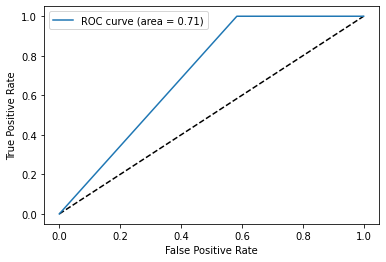

In [37]:
print("Confusion Matrix       : \n" ,confusion_matrix(y_test,y_pred3))
print("Accuracy of Model      : ",accuracy_score(y_test, y_pred3))
print("Precision of Model     : ",precision_score(y_test, y_pred3))
print("Recall of Model        : " , recall_score(y_test, y_pred3))
print("F1 Score of Model      : " ,f1_score(y_test, y_pred3))
print("ROC_AUC score of Model : " ,roc_auc_score(y_test,y_pred3))	
fpr, tpr, thresholds = roc_curve(y_test,y_pred3)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')


**4.Using RandomForest Classifier -** 

Perform the parameter tuning and list your best performance metrics on -

Precision ,Recall & F1 Score ,AUROC

In [45]:
forest = RandomForestClassifier(random_state=21)
forest.fit(X_train,Y_train)
y_pred4 = forest.predict(x_test)
print("y_pred4 : ",y_pred4)

y_pred4 :  [0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 1 0 1 0 1]


Confusion Matrix       : 
 [[ 23  25]
 [  4 102]]
Accuracy of Model      :  0.8116883116883117
Precision of Model     :  0.8031496062992126
Recall of Model        :  0.9622641509433962
F1 Score of Model      :  0.8755364806866953
ROC_AUC score of Model :  0.7207154088050314


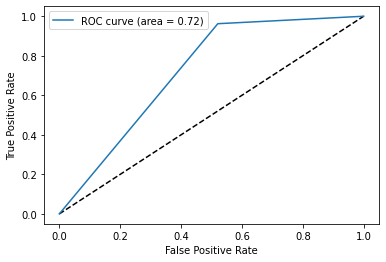

In [46]:
print("Confusion Matrix       : \n" ,confusion_matrix(y_test,y_pred4))
print("Accuracy of Model      : ",accuracy_score(y_test, y_pred4))
print("Precision of Model     : ",precision_score(y_test, y_pred4))
print("Recall of Model        : " , recall_score(y_test, y_pred4))
print("F1 Score of Model      : " ,f1_score(y_test, y_pred4))
print("ROC_AUC score of Model : " ,roc_auc_score(y_test,y_pred4))
#plotting the ROC curve 
fpr, tpr, thresholds = roc_curve(y_test,y_pred4)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred4))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

1. Using Label Encoding :
  * Logistic Regression
    * Accuracy      : 82.46 %
    * Precision     : 79.69 %
  * Random Forest
    * Accuracy      : 81.16 %
    * Precision     : 80.31 %
2. Using One Hot Encoding :
  * Logistic Regression
    * Accuracy      : 81.81 %
    * Precision     : 79.10 %
  * Random Forest
    * Accuracy      : 81.16 %
    * Precision     : 80.31 %

By the resuls it is clear that

 **Label encoding gave better results for Logistic Regression**
 
Whlie 
 
 **The results for Random Forest in One Hot encoding and Label Encoding were same**

In [26]:
print(logi)
print(forest)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=21, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)
